### Importing packages

In [4]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


### Exploring data

In [5]:
## Exploring files in folder
folder_path = 'Data'
for path, directories, files in os.walk(folder_path):
    print(path,'--> number of files : ', len(files))

Data --> number of files :  0
Data\asl_alphabet_test --> number of files :  28
Data\asl_alphabet_train --> number of files :  0
Data\asl_alphabet_train\A --> number of files :  3000
Data\asl_alphabet_train\B --> number of files :  3000
Data\asl_alphabet_train\C --> number of files :  3000
Data\asl_alphabet_train\D --> number of files :  3000
Data\asl_alphabet_train\del --> number of files :  3000
Data\asl_alphabet_train\E --> number of files :  3000
Data\asl_alphabet_train\F --> number of files :  3000
Data\asl_alphabet_train\G --> number of files :  3000
Data\asl_alphabet_train\H --> number of files :  3000
Data\asl_alphabet_train\I --> number of files :  3000
Data\asl_alphabet_train\J --> number of files :  3000
Data\asl_alphabet_train\K --> number of files :  3000
Data\asl_alphabet_train\L --> number of files :  3000
Data\asl_alphabet_train\M --> number of files :  3000
Data\asl_alphabet_train\N --> number of files :  3000
Data\asl_alphabet_train\nothing --> number of files :  3000


In [6]:
#Preparing data in dataframe for easier data handling
train_folder = 'Data/asl_alphabet_train'
all_data = []
for folder in os.listdir(train_folder):
    # GET ALL FILES IN FOLDER
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,A,Data/asl_alphabet_train\A\A1.jpg
1,A,Data/asl_alphabet_train\A\A10.jpg
2,A,Data/asl_alphabet_train\A\A100.jpg
3,A,Data/asl_alphabet_train\A\A1000.jpg
4,A,Data/asl_alphabet_train\A\A1001.jpg
...,...,...
86995,Z,Data/asl_alphabet_train\Z\Z995.jpg
86996,Z,Data/asl_alphabet_train\Z\Z996.jpg
86997,Z,Data/asl_alphabet_train\Z\Z997.jpg
86998,Z,Data/asl_alphabet_train\Z\Z998.jpg


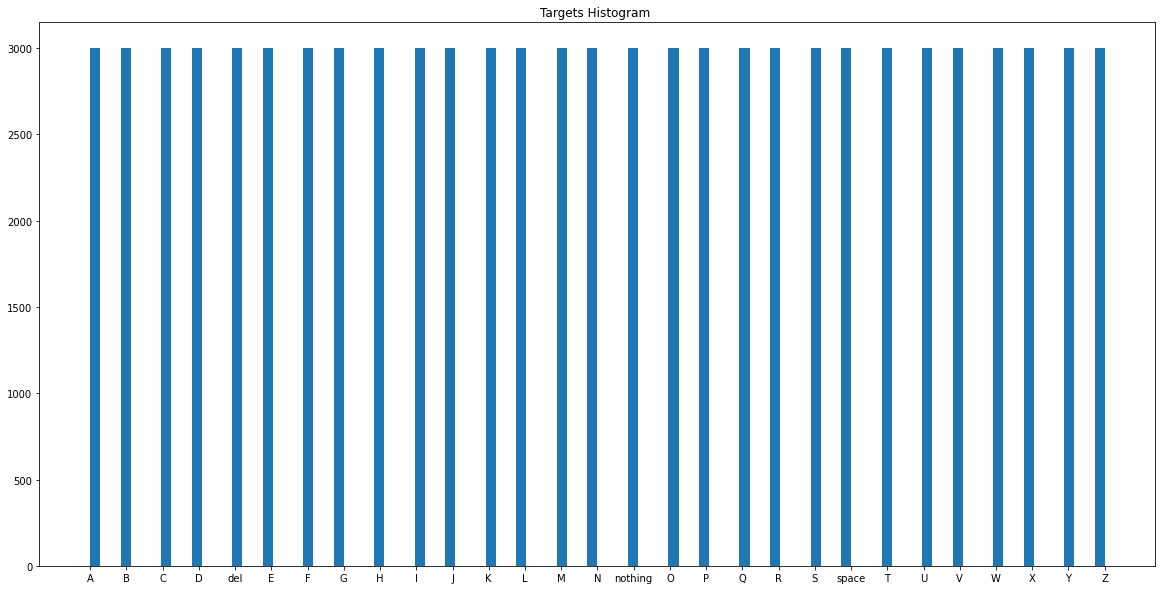

In [7]:
# Distrubtion of the target
fig, ax = plt.subplots(figsize =(20, 10))
ax.hist(data_df['label'], bins=100)
ax.set_title(f'Targets Histogram ')
plt.show()

C:\Users\marut\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


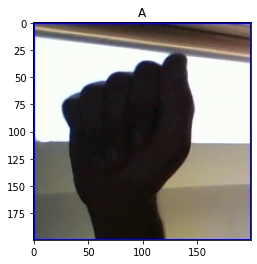

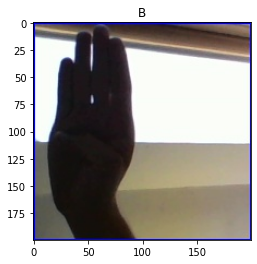

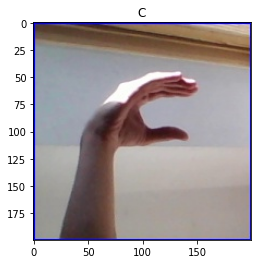

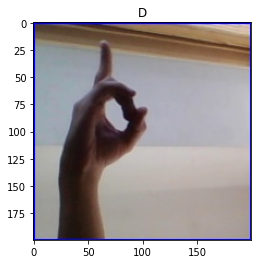

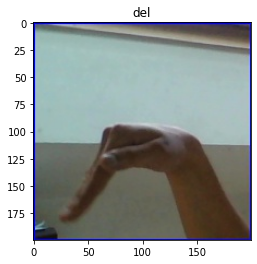

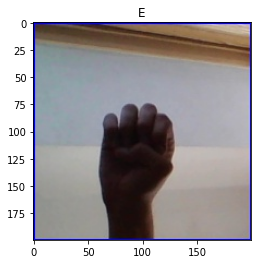

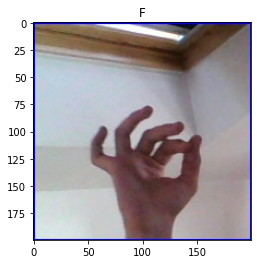

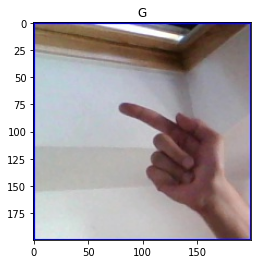

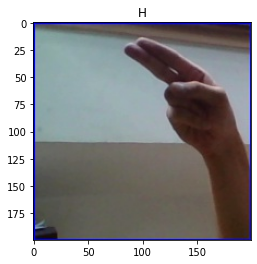

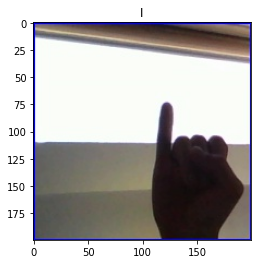

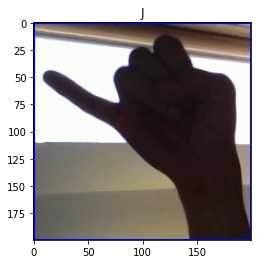

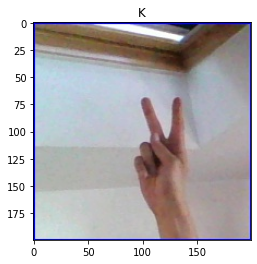

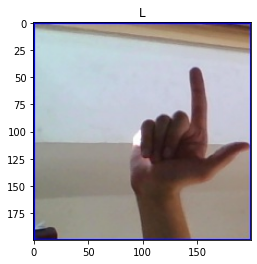

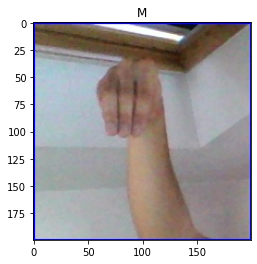

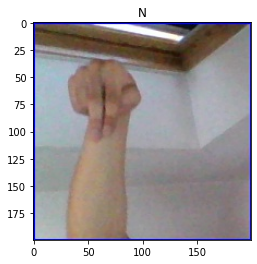

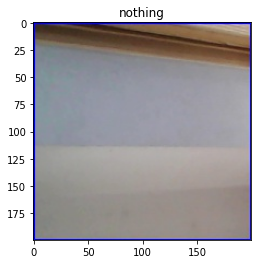

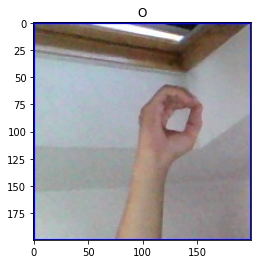

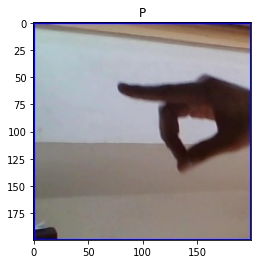

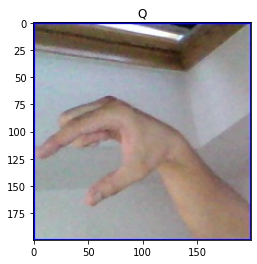

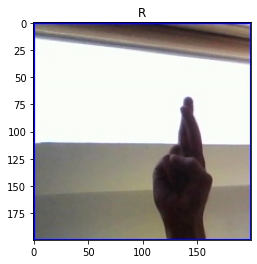

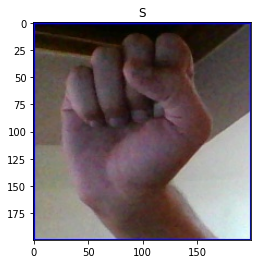

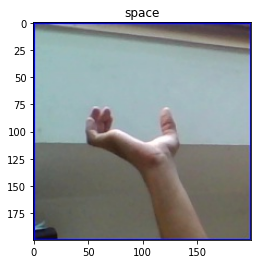

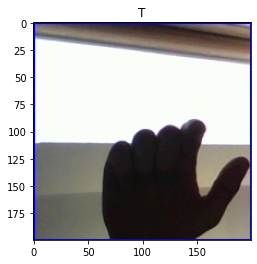

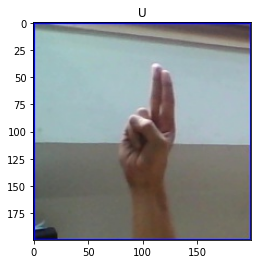

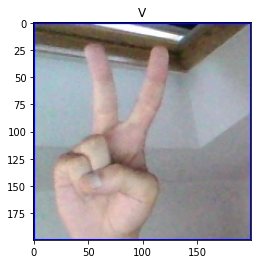

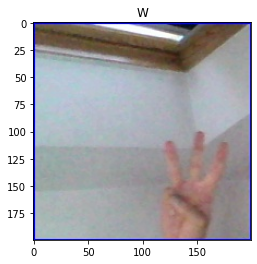

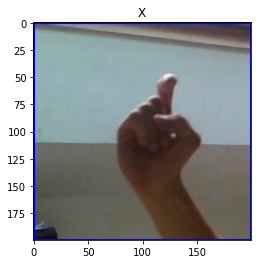

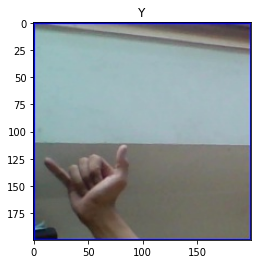

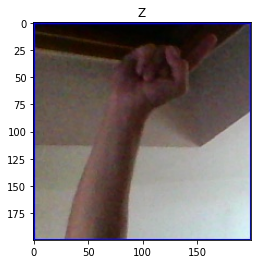

In [8]:
#SHOWING SOME RANDOM IMAGES
import random
import matplotlib.image as mpimg

signs = data_df['label'].unique().tolist()
images = []
for sign in signs:
    rows = data_df[data_df['label']==sign]['path']
    random_pick = random.randint(a=0, b=len(rows))
    filepath = rows.iloc[random_pick]
    img = mpimg.imread(filepath)
    plt.figure()
    plt.title(sign)
    plt.imshow(img)

In [9]:
rnd_img =  mpimg.imread(data_df['path'].iloc[0])
print(f'image size : {rnd_img.shape}')

image size : (200, 200, 3)


#### Splitting data

In [10]:
from sklearn.model_selection import train_test_split
#ENCODING LABEL to 0,1,2,3,4,5,6, etc..
# parameters
x_col = 'path'
y_col = 'label'
test_size = 0.2

#splitting data ..................
train_df, test_df = train_test_split(data_df, test_size= test_size, random_state=42,stratify=data_df[[y_col]])
print(f'train size : {len(train_df)}')
print(f'test size : {len(test_df)}')

train size : 69600
test size : 17400


In [11]:
# CREATING DATA GENERATORS

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 64, 64
batch_size = 32
no_of_classes = len(data_df[y_col].unique())

# NO AUGMENTAION, JUST NRORMALIZING THE DATA
# TRAINING GENERATOR
train_datagen = ImageDataGenerator(rescale = 1/255.0)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

# TESTING GENERATOR
validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=test_df, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)


Found 69600 validated image filenames belonging to 29 classes.
Found 17400 validated image filenames belonging to 29 classes.


### Modeling

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(no_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [13]:
# OERFORMING EARLY STOPS 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss',patience=2)
# put model trackers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# TRAINNING
epochs = 30
history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks = [early_stop]
                   )


Epoch 1/30
2175/2175 [==============================] - 883s 406ms/step - loss: 0.8010 - accuracy: 0.7546 - val_loss: 0.2325 - val_accuracy: 0.9274
Epoch 2/30
2175/2175 [==============================] - 310s 143ms/step - loss: 0.1101 - accuracy: 0.9647 - val_loss: 0.0841 - val_accuracy: 0.9738
Epoch 3/30
2175/2175 [==============================] - 316s 145ms/step - loss: 0.0614 - accuracy: 0.9798 - val_loss: 0.0972 - val_accuracy: 0.9705
Epoch 4/30
2175/2175 [==============================] - 303s 139ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 5/30
2175/2175 [==============================] - 322s 148ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0286 - val_accuracy: 0.9913
Epoch 6/30
2175/2175 [==============================] - 308s 142ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0644 - val_accuracy: 0.9813
Epoch 7/30
2175/2175 [==============================] - 308s 142ms/step - loss: 0.0267 - accuracy: 0.9922 - val_

## Model metrics

In [15]:
metrics = pd.DataFrame(history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.801020,0.754612,0.232549,0.927356
1,0.110072,0.964741,0.084123,0.973793
2,0.061361,0.979842,0.097199,0.970460
3,0.050040,0.984382,0.043738,0.987356
4,0.036072,0.988879,0.028638,0.991322
5,0.029061,0.991336,0.064381,0.981264
6,0.026733,0.992198,0.017760,0.994253
7,0.028838,0.991494,0.011405,0.996494
8,0.018137,0.994856,0.022421,0.993966
9,0.025129,0.992888,0.024933,0.993563


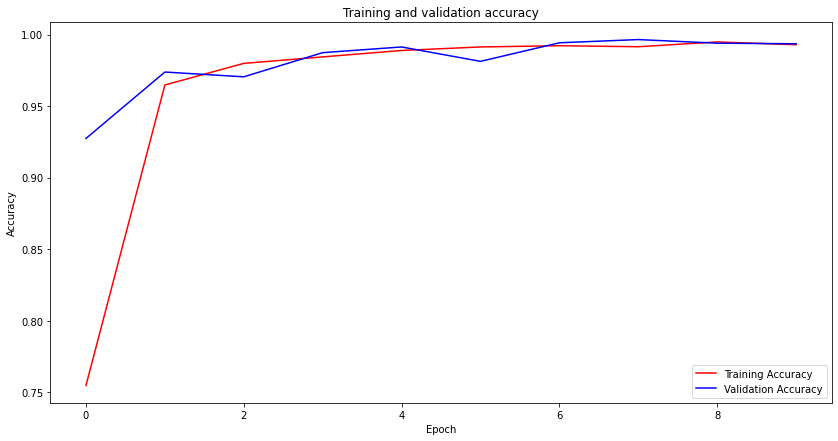

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss')

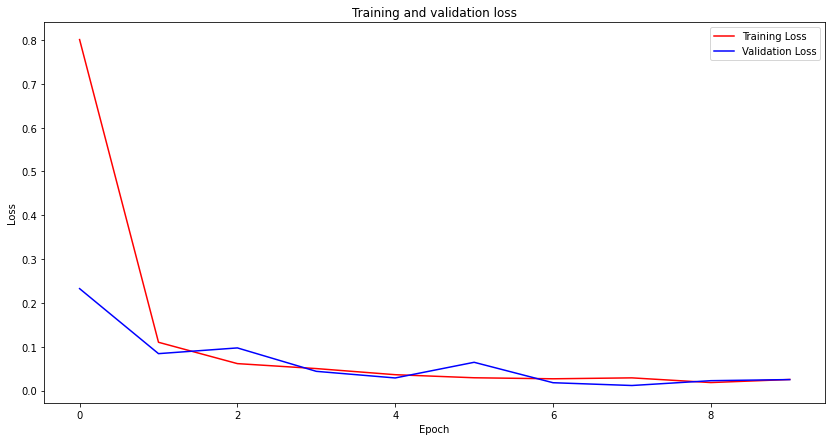

In [17]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [18]:
test_loss, test_acc = model.evaluate(validation_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

544/544 [==============================] - 30s 54ms/step - loss: 0.0249 - accuracy: 0.9936
loss : 0.02493290603160858 acc : 0.9935632348060608


In [19]:
from sklearn import metrics

predictions = model.predict(validation_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

544/544 [==============================] - 27s 49ms/step
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       600
           B       0.99      0.99      0.99       600
           C       1.00      0.99      1.00       600
           D       0.99      0.99      0.99       600
           E       1.00      0.99      1.00       600
           F       1.00      1.00      1.00       600
           G       1.00      1.00      1.00       600
           H       1.00      1.00      1.00       600
           I       1.00      1.00      1.00       600
           J       1.00      1.00      1.00       600
           K       1.00      1.00      1.00       600
           L       0.99      1.00      1.00       600
           M       0.99      0.99      0.99       600
           N       0.98      1.00      0.99       600
           O       0.99      0.99      0.99       600
           P       0.98      1.00      0.99       600
           Q       1.00 

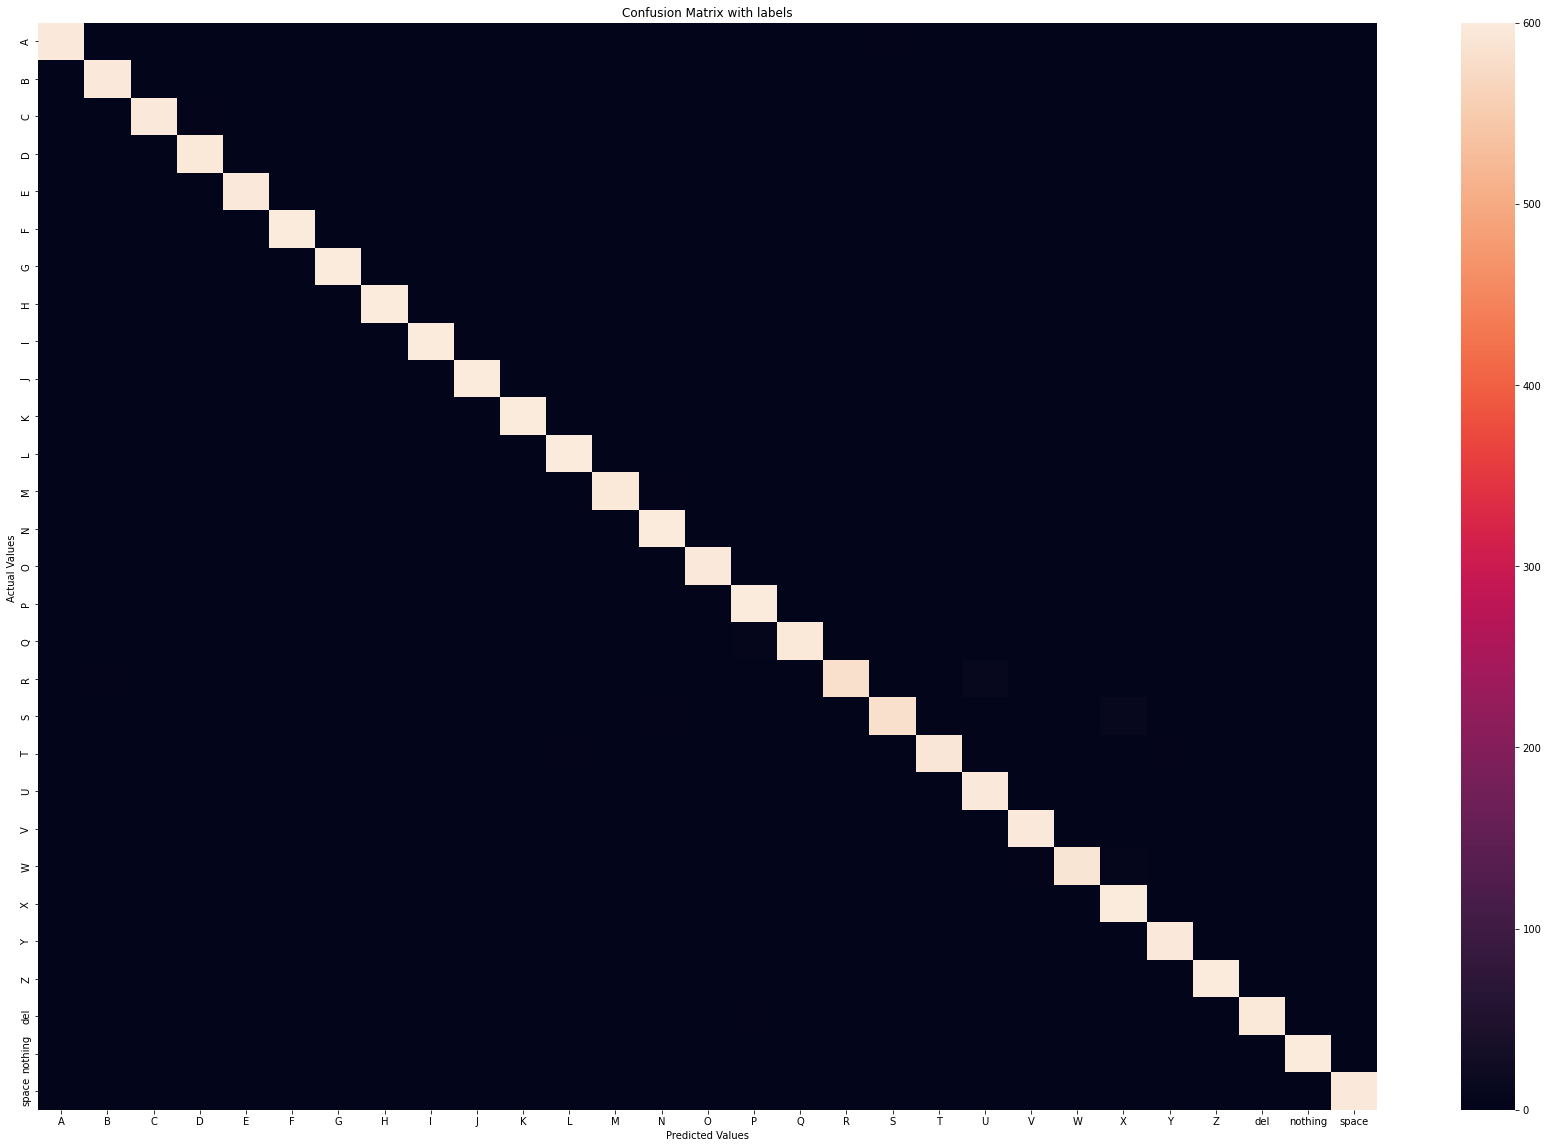

In [20]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(true_classes,predicted_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()


In [21]:
# from keras.models import load_model
model.save('Final_model.h5')
print("Model saved successfully...")

Model saved successfully...


[back to top](#19)